In [10]:
# https://www.tensorflow.org/tutorials/keras/basic_classification

In [7]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.9.0


In [9]:
# We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned 
# to classify images. You can access the Fashion MNIST directly from TensorFlow, just import and load the data:



In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 10s 2us/step


In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [15]:
#Explore the data
train_images.shape


(60000, 28, 28)

In [14]:
len(train_labels)


60000

In [16]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
test_images.shape


(10000, 28, 28)

In [18]:
len(test_labels)


10000

# Preprocess the data

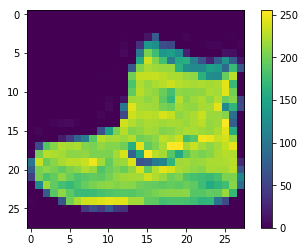

In [19]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [20]:
# We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. 
# It's important that the training set and the testing set are preprocessed in the same way:

train_images = train_images / 255.0
test_images = test_images / 255.0

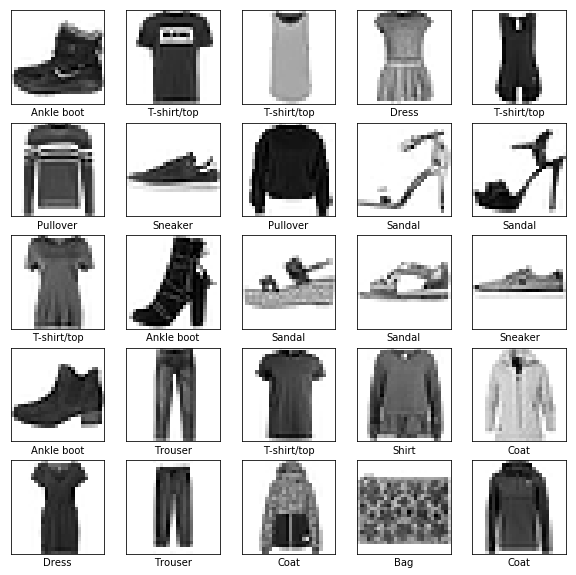

In [21]:
# Display the first 25 images from the training set and display the class name below each image. 
# Verify that the data is in the correct format and we're ready to build and train the network.

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model

In [23]:
# The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array
# (of 28 by 28 pixels)
# , to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. 
# This layer has no parameters to learn; it only reformats the data.

# After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. 
# These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). 
# The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. 
# Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model

In [25]:
# Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" 
# the model in the right direction.

# Optimizer —This is how the model is updated based on the data it sees and its loss function.

# Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images
# that are correctly classified.

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

In [26]:
# Training the neural network model requires the following steps:

# 1- Feed the training data to the model—in this example, the train_images and train_labels arrays.
# 2- The model learns to associate images and labels.
# 3- We ask the model to make predictions about a test set—in this example, the test_images array. 
# We verify that the predictions match the labels from the test_labels array.

# To start training, call the model.fit method—the model is "fit" to the training data:

model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.5041 - acc: 0.8217
Epoch 2/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.3789 - acc: 0.8631
Epoch 3/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.3381 - acc: 0.8765
Epoch 4/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.3156 - acc: 0.8840
Epoch 5/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.2962 - acc: 0.8900


# Evaluate accuracy

In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 16us/step
Test accuracy: 0.8641


In [28]:
# It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. 
# This gap between training accuracy and test accuracy is an example of overfitting. Overfitting is when a machine learning 
# model performs worse on new data than on their training data.

# Make predictions

In [29]:
# With the model trained, we can use it to make predictions about some images.

predictions = model.predict(test_images)


In [30]:
# Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

predictions[0]

array([1.1397913e-05, 7.5716375e-09, 2.0190416e-06, 1.3882930e-08,
       4.4358214e-07, 6.0187099e-03, 2.4646756e-06, 9.0373596e-03,
       3.1181357e-06, 9.8492450e-01], dtype=float32)

In [31]:
# A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each 
# of the 10 different articles of clothing. We can see which label has the highest confidence value:

np.argmax(predictions[0])


9

In [32]:
test_labels[0]


9

In [33]:
# We can graph this to look at the full set of 10 channels

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

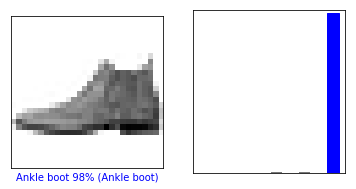

In [34]:
# Let's look at the 0th image, predictions, and prediction array.

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

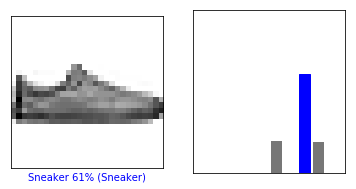

In [35]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

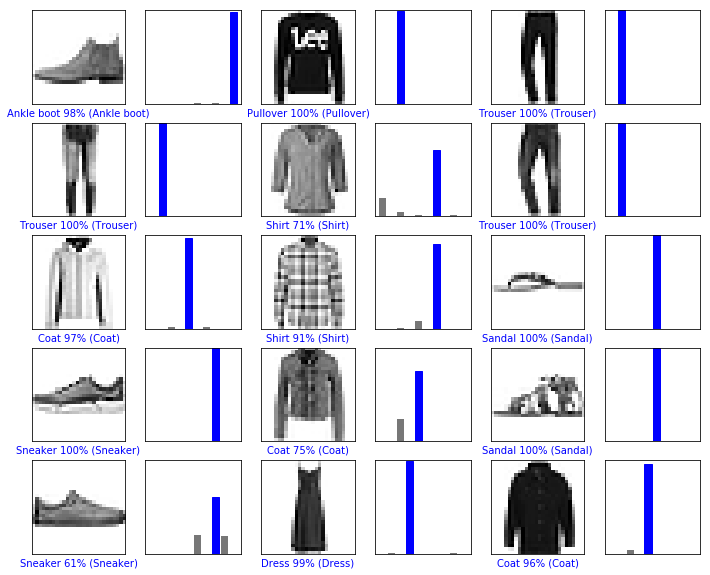

In [36]:
# Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. 
# The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident.

# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [37]:
# Finally, use the trained model to make a prediction about a single image.
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [38]:
# tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. 
# So even though we're using a single image, we need to add it to a list:

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [39]:
# Now predict the image:

predictions_single = model.predict(img)

print(predictions_single)

[[1.1397913e-05 7.5716375e-09 2.0190437e-06 1.3882930e-08 4.4358256e-07
  6.0187015e-03 2.4646779e-06 9.0373596e-03 3.1181385e-06 9.8492450e-01]]


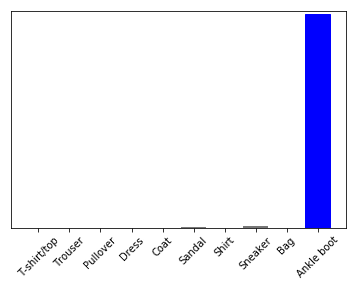

In [40]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [41]:
# model.predict returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) 
# image in the batch:

np.argmax(predictions_single[0])


9